In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']


In [4]:
Y=df.loc[:,'Class']


In [ ]:
folder='fs_chi'

In [5]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
f_score=chi2(X,Y)   #returns f score and p value 
f_score

In [ ]:
p_value=pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=False,inplace=True)
p_value=p_value[:20]

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
p_value.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("p_values")
plt.title("chi squared test based on p value")
#plt.show()
plt.savefig('paper/chi squared test based on p value.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [ ]:
import tracemalloc
import os
import psutil
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[5.23504521e-03 6.85434018e-05 2.52259227e-04 9.04313976e-03
 2.63551591e-03 4.03520862e-03 3.05882907e-03 2.76871517e-03
 6.17042642e-03 1.29452759e-02 5.36352277e-03 2.89416313e-03
 4.87062321e-03 1.31089245e-02 5.65328237e-03 1.76035377e-03
 3.38693053e-03 0.00000000e+00 4.16801669e-03 5.80562177e-03
 1.53836116e-04 2.95383059e-03 1.51121025e-03 4.27447661e-03
 8.25692076e-03 4.74443134e-03 5.42586790e-03 5.76553449e-05
 2.33039320e-03 1.20913224e-05 5.06838103e-03 2.86503403e-03
 2.34150008e-04 3.39918852e-03 3.33597022e-03 4.64835766e-03
 3.44283855e-03 3.09003090e-03 4.68126792e-03 2.47526063e-04
 5.37746384e-03 0.00000000e+00 2.90890235e-03 6.33657206e-04
 2.27614002e-03 5.17552454e-04 9.74011990e-06 3.23552990e-03
 2.96249574e-03 5.88737977e-06 5.82290404e-04 0.00000000e+00
 2.15583955e-03 1.15289736e-02 7.94317610e-04 2.42338377e-03
 5.88334224e-06 1.06205050e-04 0.00000000e+00 4.89671548e-05
 4.37210659e-04 2.54685901e-03 5.35272889e-03 2.47566698e-03
 2.99445738e-04 6.819052

In [8]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=False)

,extratrees
200,0.051383
168,0.024186
106,0.023957
357,0.014572
13,0.013109
...,...
360,0.000000
205,0.000000
442,0.000000
389,0.000000


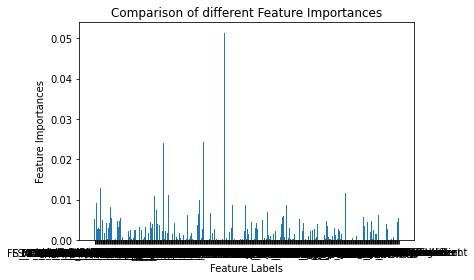

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
plt.bar(X.columns, model.feature_importances_)
feat_imp=dict(zip(X.columns,model.feature_importances_))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [12]:
feat_imp

{'ACCESS_PERSONAL_INFO___': 0.005235045209907832,
 'ALTER_PHONE_STATE___': 6.854340179964707e-05,
 'ANTI_DEBUG_____': 0.0002522592265486588,
 'CREATE_FOLDER_____': 0.00904313976261672,
 'CREATE_PROCESS`_____': 0.002635515913146542,
 'CREATE_THREAD_____': 0.004035208623670539,
 'DEVICE_ACCESS_____': 0.0030588290737348957,
 'EXECUTE_____': 0.002768715165877223,
 'FS_ACCESS____': 0.00617042641688521,
 'FS_ACCESS()____': 0.012945275945791096,
 'FS_ACCESS(CREATE)____': 0.005363522771441595,
 'FS_ACCESS(CREATE__APPEND)__': 0.002894163131253922,
 'FS_ACCESS(CREATE__READ)__': 0.0048706232059857295,
 'FS_ACCESS(CREATE__READ__WRITE)': 0.013108924492965685,
 'FS_ACCESS(CREATE__WRITE)__': 0.005653282368103163,
 'FS_ACCESS(CREATE__WRITE__APPEND)': 0.0017603537735726854,
 'FS_ACCESS(READ)____': 0.003386930529545039,
 'FS_ACCESS(READ__WRITE)__': 0.0,
 'FS_ACCESS(WRITE)____': 0.004168016687202343,
 'FS_PIPE_ACCESS___': 0.00580562177178191,
 'FS_PIPE_ACCESS()___': 0.00015383611586592834,
 'FS_PIPE_ACCE

In [17]:
import operator
sorted_x = sorted(feat_imp.items(), key=operator.itemgetter(1),reverse=True)
sorted_x

[('getReceiverInfo', 0.051383238577175847),
 ('getInstallerPackageName', 0.024185926742895648),
 ('ftruncate64', 0.023957491542714225),
 ('resolveContentProvider', 0.014571633079316384),
 ('FS_ACCESS(CREATE__READ__WRITE)', 0.013108924492965685),
 ('FS_ACCESS()____', 0.012945275945791096),
 ('getServiceInfo', 0.012927513037485771),
 ('remove', 0.012571760494452782),
 ('getApplicationRestrictions', 0.012068090060187647),
 ('setInTouchMode', 0.01163051146420129),
 ('brk', 0.011528973586488083),
 ('getActivityInfo', 0.011219235206193078),
 ('fchmod', 0.010927907929052046),
 ('fdatasync', 0.010639900806300374),
 ('sendto', 0.010556072484269709),
 ('getInputDeviceIds', 0.00999836947468596),
 ('rename', 0.009431597499969234),
 ('unlink', 0.009344694446645756),
 ('queryIntentServices', 0.009268784812441325),
 ('CREATE_FOLDER_____', 0.00904313976261672),
 ('getWifiServiceMessenger', 0.008742861422686602),
 ('getSubscriberId', 0.00869950134279953),
 ('mprotect', 0.008637435431805703),
 ('openSes

In [23]:
type(sorted_x)
f=[]
for x in sorted_x:
    print(x[0])
    f.append(x[0])

getReceiverInfo
getInstallerPackageName
ftruncate64
resolveContentProvider
FS_ACCESS(CREATE__READ__WRITE)
FS_ACCESS()____
getServiceInfo
remove
getApplicationRestrictions
setInTouchMode
brk
getActivityInfo
fchmod
fdatasync
sendto
getInputDeviceIds
rename
unlink
queryIntentServices
CREATE_FOLDER_____
getWifiServiceMessenger
getSubscriberId
mprotect
openSession
FS_PIPE_ACCESS(WRITE)___
fcntl64
fsync
getAnimationScale
sigprocmask
isActiveNetworkMetered
fstat64
munmap
chmod
getMode
pread64
getInTouchMode
registerInputDevicesChangedListener
statfs64
pwrite64
FS_ACCESS____
getDeviceId
getRingerMode
mkdir
isSpeakerphoneOn
FS_PIPE_ACCESS___
setpgid
FS_ACCESS(CREATE__WRITE)__
madvise
writev
NETWORK_ACCESS()____
access
FS_ACCESS(CREATE)____
checkPackage
ACCESS_PERSONAL_INFO___
fchown32
msync
mmap2
pipe
NETWORK_ACCESS(WRITE)____
stat64
hasSystemFeature
finishInput
FS_ACCESS(CREATE__READ)__
getInputDevice
resolveIntent
NETWORK_ACCESS____
_newselect
getsockopt
__arm_nr_cacheflush
sigaltstack
clock_

In [ ]:
# Feature extraction
acc=[]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
t=[]
for i in range(2,471):
    #test = SelectKBest(score_func=chi2, k=i)
    #fit = test.fit(X, Y)
    feat=f[:i]
    X_f = X=df.loc[:,feat]
    
    tracemalloc.start()
    start = time.process_time()
    #model = lgb.LGBMClassifier().fit(X,Y)
    #total_t.append(time.process_time() - start)
    #print(i,'',time.process_time() - start)
    model = lgb.LGBMClassifier().fit(X_f,Y)
    t.append(time.process_time() - start)
    print(i,'',time.process_time() - start)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    acc.append(mean(scores))
    print(i,' ' ,( mean(scores), std(scores)))

2  0.390625
2   (0.9340117570636599, 0.004801885640864378)
3  0.671875
3   (0.9353335713506491, 0.00495895002612189)
4  0.6875
4   (0.9366268483532177, 0.004606040981485042)
5  0.796875
5   (0.9429495056182005, 0.005042524211933554)
6  0.890625
6   (0.9429496295855524, 0.0058337824734316845)
7  0.609375
7   (0.9431795394364941, 0.005889905292075285)
8  0.71875
8   (0.9443005514067817, 0.005493609211572129)
9  0.703125
9   (0.9469447502305791, 0.0051777109598241606)
10  0.75
10   (0.9465424513800047, 0.005272986321753744)
11  0.84375
11   (0.9478067200222149, 0.00625913984963866)
12  0.84375
12   (0.9501061160532763, 0.005662845577096567)
13  0.90625
13   (0.9511119375601241, 0.005613355993839656)
14  1.09375
14   (0.9519167336090368, 0.005471758492251966)
15  0.828125
15   (0.9556814981206548, 0.0053309999215698945)
16  0.734375
16   (0.9570611307805975, 0.005164174107784674)
17  1.015625
17   (0.9569750230579273, 0.0052390569672280144)
18  1.15625
18   (0.9578086043259646, 0.005449588

137   (0.9795366348318507, 0.0035828487180057313)
138  3.453125
138   (0.9795366348318507, 0.0035828487180057313)
139  3.375
139   (0.979910297224123, 0.0037599504465508794)
140  3.3125
140   (0.9799103220175934, 0.003883092652137117)
141  3.390625
141   (0.9797378586375493, 0.0036976124867063873)
142  3.53125
142   (0.9797665942697332, 0.003730875992298541)
143  3.15625
143   (0.9797665942697332, 0.003730875992298541)
144  3.3125
144   (0.9797665942697332, 0.0036299136034624365)
145  3.15625
145   (0.979938983269366, 0.0034924345856292764)
146  3.3125
146   (0.979938983269366, 0.0034924345856292764)
147  4.125
147   (0.9797378338440786, 0.0036568292736659344)
148  4.703125
148   (0.9802551496038004, 0.0038716807999974426)
149  3.9375
149   (0.9796517261214086, 0.0035732164685678258)
150  3.390625
150   (0.9797380073983715, 0.003709943975752142)
151  3.9375
151   (0.9801401822815944, 0.0034241460015898848)
152  3.5
152   (0.9801976287524917, 0.0034244422087510965)
153  3.53125
153   (0

In [ ]:
import matplotlib.pyplot as plt
t=[]
for i in range(2,470):
    t.append(i)
x_axis = np.arange(len(t))
ind = np.arange(len(t)) 
width = 0.1
plt.plot(t, acc[:-1])
 
# naming the x axis
plt.xlabel('Number of features')
# naming the y axis
plt.ylabel('Accuracy')
#plt.yticks('2','10','11','12')
# giving a title to my graph
plt.title('Accuracy at different feature set size using Chi-Square Test')
plt.savefig('paper/Accuracy at different feature set size using Chi-Square Test.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight') 

In [ ]:
i=10
for a in acc:
    if a>0.98:
        print(i,' ',a)
    i=i+1

In [25]:
import tracemalloc
import os
import psutil
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
#x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
model = lgb.LGBMClassifier().fit(X,Y)
#model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],          verbose=20,eval_metric='logloss')

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('>%.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
acc=[]
acc.append(0.980082686223756)
pre=[]
rec=[]
f1=[]
tim=[]
mem=[]

In [ ]:
total_t=[]

In [ ]:
for i in range(2,471):
    test = SelectKBest(score_func=chi2, k=i)
    fit = test.fit(X, Y)
    X_f = fit.transform(X)
    tracemalloc.start()
    start = time.process_time()
    model = lgb.LGBMClassifier().fit(X,Y)
    total_t.append(time.process_time() - start)
    print(i,'',time.process_time() - start)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
test = SelectKBest(score_func=chi2, k=219)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = lgb.LGBMClassifier().fit(X,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = RandomForestClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = GaussianNB().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = SVC(kernel ='rbf', random_state = 1).fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = tree.DecisionTreeClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = LogisticRegression().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = ExtraTreesClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = AdaBoostClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = BaggingClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = GradientBoostingClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tracemalloc
import os
import psutil
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
test = SelectKBest(score_func=chi2, k=125)
fit = test.fit(X, Y)
X_f = fit.transform(X)
tracemalloc.start()
start = time.process_time()
model = KNeighborsClassifier().fit(X_f,Y)
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())

tim.append(time.process_time() - start)
mem.append(tracemalloc.get_traced_memory())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_f, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
acc.append(mean(scores))
print('>a %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
pre.append(mean(scores))
print('>p %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
rec.append(mean(scores))
print('>r %.4f (%.4f)' % ( mean(scores), std(scores)))
scores = cross_val_score(model, X_f, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
f1.append(mean(scores))
print('>f1 %.4f (%.4f)' % ( mean(scores), std(scores)))

In [1]:
acc=[0.980082686223756,0.9756,
 0.9777258437217974,
 0.862908001348765,
 0.8575615869804527,
 0.9668331796138169,
 0.9004432080767208,0.9733,0.9634,0.9736,0.9692,0.9186 ]
#acc

In [2]:
pre=[0.9838561501006995,0.9784,
 0.981054219573419,
 0.9426974749754735,
 0.8580625393834619,
 0.9784349872093681,
 0.915258630315717,0.9764,0.9687,0.9837,0.9714,0.9364]
#pre

In [3]:
rec=[0.9919414106111354,0.9934 ,
 0.9926896059137212,
 0.8922101215613666,
 0.9962937998848879,
 0.9815361251534255,
 0.9723214545757143,0.9915,0.9886,0.9853,0.9928,0.9696]
#rec

In [ ]:
len(rec)

In [4]:
f1=[0.9878782155255005,0.9857 ,
 0.9869215801198996,
 0.9165587191753655,
 0.9220226852329794,
 0.9798868211024274,
 0.9429004362267244,0.9845,0.9785,0.9842,0.9820,0.9527]

In [ ]:
tim=[2.40625,7.265625, 3.09375, 0.09375, 5.515625, 2.296875, 1.421875,1.984375,2.40625,3.609375,9.890625,0.0]

In [ ]:
mem=[(76325, 17529264), (12552200, 30268274),
 (12285312, 19074825),
 (12334337, 32130452),
 (16215137, 36010169),
 (12931209, 36010169),
 (24679379, 36010169)]

In [ ]:
len(acc)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','GradientBoosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, acc, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Accuracy")
#plt.legend()
plt.title("Accuracy")
# Display

plt.savefig('paper/Accuracy.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, pre, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Precision")
#plt.legend()
plt.title("Precision")
# Display

plt.savefig('paper/Precision.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind,rec, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Recall")
#plt.legend()
plt.title("Recall")
# Display

plt.savefig('paper/Recall.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind,f1, width)
plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("F1-Score")
#plt.legend()
plt.title("F1-Score")
# Display

plt.savefig('paper/F1-Score.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.4
#acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, tim, width)
#plt.ylim([0.85,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
plt.ylabel("Training time in seconds")
#plt.legend()
plt.title("Training time in seconds")
# Display

plt.savefig('paper/Training time in seconds.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')

In [11]:
#x_axis = np.arange(len(t))
#ind = np.arange(len(t))
width = 0.1
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Proposed','Shafin et al.(2021)','Random forest','Naive Bayes','SVM','Decision Tree','Logistic Regression','Extra Trees Classifier','AdaBoost','Bagging','Gradient Boosting','KNN']
x_axis = np.arange(len(t))
ind = np.arange(len(t))

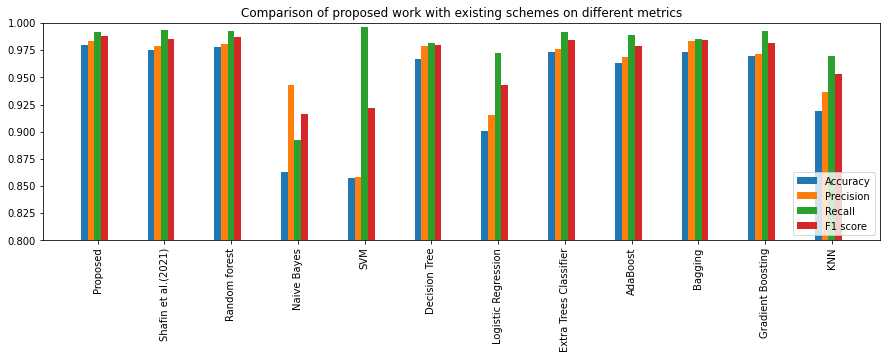

In [15]:
plt.figure(figsize=(15,4))
plt.bar(ind-2*width,acc, width,label='Accuracy')
plt.bar(ind-width, pre, width,label='Precision')
plt.bar(ind, rec, width,label='Recall')
plt.bar(ind+width, f1, width,label='F1 score')
plt.ylim([0.8,1])
plt.xticks(x_axis, t)
plt.xticks(rotation=90)


#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
#plt.ylabel("Recall")
plt.legend(loc=4)
plt.title("Comparison of proposed work with existing schemes on different metrics")
plt.savefig('paper/Comparison of proposed work with existing schemes on different metrics.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')
#plt.show()